In [2]:
%config InlineBackend.rc = {"figure.dpi": 72, "figure.figsize": (6.0, 4.0)}
%matplotlib inline

import ase
import matplotlib.pyplot as plt
import numpy as np
from ase.cluster import Decahedron

import abtem

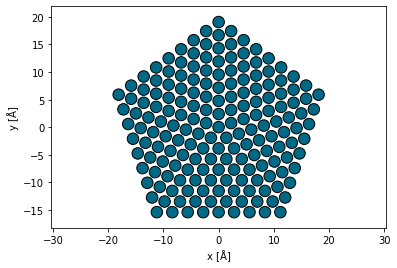

In [11]:
cluster = Decahedron("Pd", 9, 2, 0)
cluster.rotate("x", -0)

abtem.show_atoms(cluster, plane="xy");

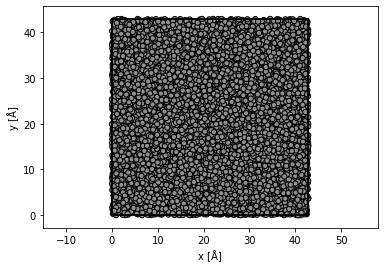

In [12]:
substrate = ase.build.bulk("C", cubic=True)

# repeat diamond structure
substrate *= (12, 12, 10)

# displace atoms with a standard deviation of 50 % of the bond length
bondlength = 1.54  # Bond length
substrate.positions[:] += np.random.randn(len(substrate), 3) * 0.5 * bondlength

# wrap the atoms displaced outside the cell back into the cell
substrate.wrap()

abtem.show_atoms(substrate, plane="xy", merge=0.5);

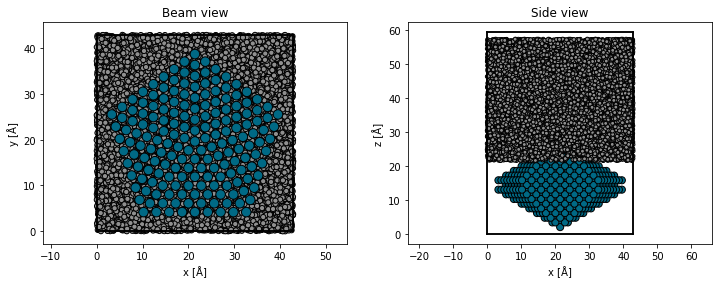

In [13]:
translated_cluster = cluster.copy()

translated_cluster.cell = substrate.cell
translated_cluster.center()
translated_cluster.translate((0, 0, -25))

atoms = substrate + translated_cluster

atoms.center(axis=2, vacuum=2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
abtem.show_atoms(atoms, plane="xy", ax=ax1, title="Beam view")
abtem.show_atoms(atoms, plane="xz", ax=ax2, title="Side view");

In [16]:
from ase.io import write

write('PdC.cfg', atoms)

In [18]:
from ase.io import read

Pd_C=read(r"C:\Users\Joshu\Documents\PdC.cfg")

In [22]:
from ase.visualize import view

view(Pd_C)

<Popen: returncode: None args: ['C:\\Users\\Joshu\\anaconda3\\envs\\myenv\\p...>